## Linear models

#### Linear regression

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
!pip install dask --upgrade ## ugly error with core.computation in pandas! this solved

Invalid requirement: '##'
Traceback (most recent call last):
  File "d:\anaconda\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "d:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1654, in parseString
    raise exc
  File "d:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1644, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "d:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1402, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "d:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 3417, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "d:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1402, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "d:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 3739, in parseI

In [3]:
DATA_DIR = 'tmp/data'
NUM_STEPS = 1000
MINIBATCH_SIZE = 100
LEARNING_RATE = 0.5

In [4]:
data = input_data.read_data_sets(DATA_DIR,one_hot = True)
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]), dtype = tf.float32)
y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = tf.matmul(x, W) + b
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_pred, labels = y_true))
gd_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting tmp/data\t10k-images-idx3-ubyte.gz
Extracting tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [4]:
with tf.Session () as sess:
# Train
    sess.run(tf.global_variables_initializer ())
    for i in range ( NUM_STEPS ):
        batch_x, batch_y = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict = {x: batch_x , y_true: batch_y})
    ans = sess.run(accuracy, feed_dict = {x: data.test.images, y_true: data.test.labels})
print ("Accuracy {:.4}% ".format(ans * 100))

Accuracy 91.51% 


#### Logistic regression

In [5]:
data = input_data.read_data_sets(DATA_DIR,one_hot = True)
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]), dtype = tf.float32)
y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = 1/(1 + tf.exp(tf.matmul(x, W) + b))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_pred, labels = y_true))
gd_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

Extracting tmp/data\train-images-idx3-ubyte.gz
Extracting tmp/data\train-labels-idx1-ubyte.gz
Extracting tmp/data\t10k-images-idx3-ubyte.gz
Extracting tmp/data\t10k-labels-idx1-ubyte.gz


(1, 784)
[[4.5347738e-04 9.9574226e-01 2.4904650e-02 5.3015947e-02 8.6976914e-03
  3.9674263e-03 3.7547359e-03 1.0760186e-01 6.6011816e-02 3.7191041e-02]]
[1]
Accuracy 88.73% 


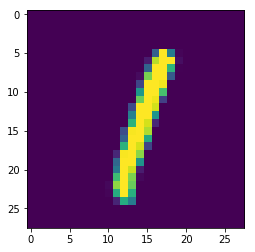

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Wall time: 1.68 s


In [7]:
%%time
NUMBER_TO_TEST = 5  #from 0 to 9999

with tf.Session () as sess:
    sess.run(tf.global_variables_initializer ())
    for i in range (NUM_STEPS):
        batch_x, batch_y = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict = {x: batch_x , y_true: batch_y})
    ans = sess.run(accuracy, feed_dict = {x: data.test.images, y_true: data.test.labels})
    
    print(data.test.images[NUMBER_TO_TEST,:][None,:].shape)
    #My code
    output_pr = sess.run(y_pred, feed_dict={x: data.test.images[NUMBER_TO_TEST,:][None,:]})
    
    output_pos =sess.run(tf.argmax(output_pr,1), feed_dict={x: data.test.images[NUMBER_TO_TEST,:][None,:]})
    #output_pos = sess.run(tf.argmax(y_pred, 1), feed_dict={x: data.test.images})
    print(output_pr)#[NUMBER_TO_TEST])
    print(output_pos)#[NUMBER_TO_TEST])
    #My code ended
    
print ("Accuracy {:.4}% ".format(ans * 100))
   
    
#My code 
import matplotlib.pyplot as plt
%matplotlib inline

plotData = data.test.images[NUMBER_TO_TEST]
plotData = plotData.reshape(28, 28)
plt.imshow(plotData)
plt.show()
print(data.test.labels[NUMBER_TO_TEST])
#My code ended

## Neural models 
#### (can be done with GPU but need extra steps) - accuracy higher then previous!

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

D:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
L1 = 60
L2 = 30
L3 = 10

DATA_DIR = 'tmp/data'
NUM_STEPS = 1000
MINIBATCH_SIZE = 100
LEARNING_RATE = 0.5

In [3]:
data = input_data.read_data_sets(DATA_DIR, one_hot = True)
x = tf.placeholder(tf.float32 , [None, 784])
l1 = tf.layers.dense(x, L1, activation = tf.nn.relu, use_bias = True)
l2 = tf.layers.dense(l1, L2, activation = tf.nn.relu, use_bias = True)
y_pred = tf.layers.dense(l2, L3, activation = tf.nn.relu, use_bias = True)

y_true = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_pred, labels = y_true))
gd_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting tmp/data\t10k-images-idx3-ubyte.gz
Extracting tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [5]:
%%time #slow learn
with tf.Session () as sess:
    sess.run(tf.global_variables_initializer())
    for i in range (NUM_STEPS):
        batch_x, batch_y = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict = {x: batch_x, y_true : batch_y})
        ans = sess.run(accuracy, feed_dict = {x: data.test.images, y_true: data.test.labels})
print("Accuracy: {:.4}% ".format(ans*100))

Accuracy: 77.65% 
Wall time: 38.3 s


[0.        0.        2.4245925 0.        0.        0.        0.
 0.        4.9801817 0.       ]
8
Accuracy 95.16% 


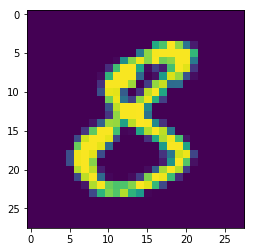

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Wall time: 2.2 s


In [7]:
%%time  #fast learn
NUMBER_TO_TEST = 1234  #from 0 to 9999    1234 was error at linear models

with tf.Session () as sess:
    sess.run(tf.global_variables_initializer ())
    for i in range (NUM_STEPS):
        batch_x, batch_y = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict = {x: batch_x , y_true: batch_y})
    ans = sess.run(accuracy, feed_dict = {x: data.test.images, y_true: data.test.labels})
    
    #My code
    output_pr = sess.run(y_pred, feed_dict={x: data.test.images})
    output_pos = sess.run(tf.argmax(y_pred, 1), feed_dict={x: data.test.images})
    print(output_pr[NUMBER_TO_TEST])
    print(output_pos[NUMBER_TO_TEST])
    #My code ended
    
print ("Accuracy {:.4}% ".format(ans * 100))
   
    
#My code 
import matplotlib.pyplot as plt
%matplotlib inline

plotData = data.test.images[NUMBER_TO_TEST]
plotData = plotData.reshape(28, 28)
plt.imshow(plotData)
plt.show()
print(data.test.labels[NUMBER_TO_TEST])
#My code ended

#### Same but another amount of layers

In [2]:
L1 = 200
L2 = 100
L3 = 60
L4 = 30
L5 = 10

DATA_DIR = 'tmp/data'
NUM_STEPS = 1000
MINIBATCH_SIZE = 100
LEARNING_RATE = 0.5

In [3]:
data = input_data.read_data_sets(DATA_DIR, one_hot = True)
x = tf.placeholder(tf.float32 , [None, 784])
l1 = tf.layers.dense(x, L1, activation = tf.nn.relu, use_bias = True)
l2 = tf.layers.dense(l1, L2, activation = tf.nn.relu, use_bias = True)
l3 = tf.layers.dense(l2, L3, activation = tf.nn.relu, use_bias = True)
l4 = tf.layers.dense(l3, L4, activation = tf.nn.relu, use_bias = True)
y_pred = tf.layers.dense(l4, L5, activation = tf.nn.sigmoid, use_bias = True)

y_true = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_pred, labels = y_true))
gd_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting tmp/data\t10k-images-idx3-ubyte.gz
Extracting tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [6]:
%%time
with tf.Session () as sess:
    sess.run(tf.global_variables_initializer())
    for i in range (NUM_STEPS):
        batch_x, batch_y = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict = {x: batch_x, y_true : batch_y})
        ans = sess.run(accuracy, feed_dict = {x: data.test.images, y_true: data.test.labels})
print("Accuracy: {:.4}% ".format(ans*100))

Accuracy: 86.85% 
Wall time: 1min 32s


[0.52113193 0.55026686 0.70388913 2.9337268  0.         1.916382
 0.5922773  0.         6.069199   0.210646  ]
8
Accuracy 96.13% 


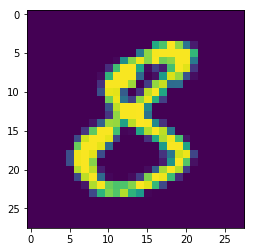

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Wall time: 4.23 s


In [4]:
%%time
NUMBER_TO_TEST = 1234  #from 0 to 9999    1234 was error at linear models

with tf.Session () as sess:
    sess.run(tf.global_variables_initializer ())
    for i in range (NUM_STEPS):
        batch_x, batch_y = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict = {x: batch_x , y_true: batch_y})
    ans = sess.run(accuracy, feed_dict = {x: data.test.images, y_true: data.test.labels})
    
    #My code
    output_pr = sess.run(y_pred, feed_dict={x: data.test.images})
    output_pos = sess.run(tf.argmax(y_pred, 1), feed_dict={x: data.test.images})
    print(output_pr[NUMBER_TO_TEST])
    print(output_pos[NUMBER_TO_TEST])
    #My code ended
    
print ("Accuracy {:.4}% ".format(ans * 100))
   
    
#My code 
import matplotlib.pyplot as plt
%matplotlib inline

plotData = data.test.images[NUMBER_TO_TEST]
plotData = plotData.reshape(28, 28)
plt.imshow(plotData)
plt.show()
print(data.test.labels[NUMBER_TO_TEST])
#My code ended